 **Authors**

1. Mohlatlego Nakeng

2.  Raymond Chiruka

# **Task**

In this task we aim to minitor the microblogs sentiments using polarity measures, then we automate the sentiments by training the classification models.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import numpy as np
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df= pd.read_csv("/content/drive/Shareddrives/MIT808 - group 6/data/Categories.csv")
print("Shape of Data => ", df.shape)

Shape of Data =>  (404768, 5)


In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


In [ ]:
# Remove URLs
df['statuses_text'] = df['statuses_text'].apply(remove_url)

In [ ]:

df.head()

,statuses_text,statuses_retweeted,location_cat,tweets_location,message_creator
0,rt drericding breakingsingleshot johnson amp j...,False,True,local,Human
1,rt bbcmorelle very good news on novavax vaccin...,False,True,local,Human
2,rt voxdotcom what makes the johnson amp johnso...,False,False,global,Human
3,rt drericding breakingsingleshot johnson amp j...,False,True,local,Human
4,rt jsavagetweets johnson amp johnson aka janss...,False,True,local,Human


In [ ]:
sentiment_objects = [TextBlob(statuses_text) for statuses_text in df['statuses_text']]

In [ ]:
# creating the polarity for each tweet
sentiment_objects[0].polarity, sentiment_objects[0]

(0.3,
 TextBlob("rt drericding breakingsingleshot johnson amp johnson vaccine was 72 effective at protecting against moderate to severe illness in us 6"))

In [ ]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[statuses_text.sentiment.polarity, str(statuses_text)] for statuses_text in sentiment_objects]


In [ ]:
sentiment_values[0]

[0.3,
 'rt drericding breakingsingleshot johnson amp johnson vaccine was 72 effective at protecting against moderate to severe illness in us 6']

In [ ]:
df.head()


,statuses_text,statuses_retweeted,location_cat,tweets_location,message_creator
0,rt drericding breakingsingleshot johnson amp j...,False,True,local,Human
1,rt bbcmorelle very good news on novavax vaccin...,False,True,local,Human
2,rt voxdotcom what makes the johnson amp johnso...,False,False,global,Human
3,rt drericding breakingsingleshot johnson amp j...,False,True,local,Human
4,rt jsavagetweets johnson amp johnson aka janss...,False,True,local,Human


In [ ]:

df = pd.DataFrame(sentiment_values, columns=["polarity", "statuses_text"])

In [ ]:
df.head()

,polarity,statuses_text
0,0.300,rt drericding breakingsingleshot johnson amp j...
1,0.855,rt bbcmorelle very good news on novavax vaccin...
2,0.000,rt voxdotcom what makes the johnson amp johnso...
3,0.300,rt drericding breakingsingleshot johnson amp j...
4,0.400,rt jsavagetweets johnson amp johnson aka janss...


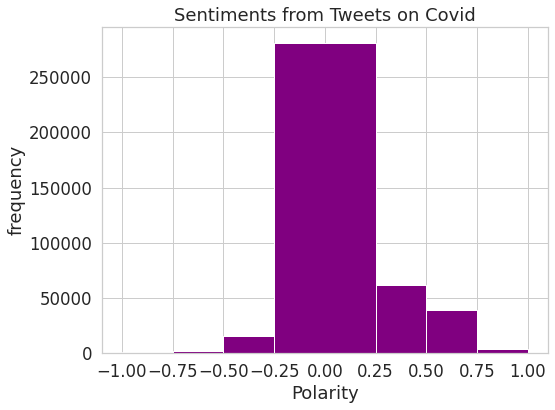

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")
plt.xlabel("Polarity")
plt.ylabel("frequency")
plt.title("Sentiments from Tweets on Covid")
plt.show()


In [ ]:
# creating a categorical variable if polarity is less than 0 then sentiment is negative, if  polarity== 0 then sentiment is neutral and else sentiment is positive
conditions = [
    (df['polarity'] < 0),
    (df['polarity'] > 0) ,
    (df['polarity'] ==0)     
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'positive', 'neutral' ]

# create a new column and use np.select to assign values to it using our lists as arguments
df['sentiment'] = np.select(conditions, values)

In [ ]:
df.head()

,polarity,statuses_text,sentiment
0,0.300,rt drericding breakingsingleshot johnson amp j...,positive
1,0.855,rt bbcmorelle very good news on novavax vaccin...,positive
2,0.000,rt voxdotcom what makes the johnson amp johnso...,neutral
3,0.300,rt drericding breakingsingleshot johnson amp j...,positive
4,0.400,rt jsavagetweets johnson amp johnson aka janss...,positive


In [ ]:
df.drop(columns=['polarity'],inplace=True)

In [ ]:
df.isnull().sum()

statuses_text    0
sentiment        0
dtype: int64

In [ ]:
length = []
[length.append(len(str(text))) for text in df['statuses_text']]
df['length'] = length
df.head()

,statuses_text,sentiment,length
0,rt drericding breakingsingleshot johnson amp j...,positive,134
1,rt bbcmorelle very good news on novavax vaccin...,positive,124
2,rt voxdotcom what makes the johnson amp johnso...,neutral,127
3,rt drericding breakingsingleshot johnson amp j...,positive,134
4,rt jsavagetweets johnson amp johnson aka janss...,positive,129


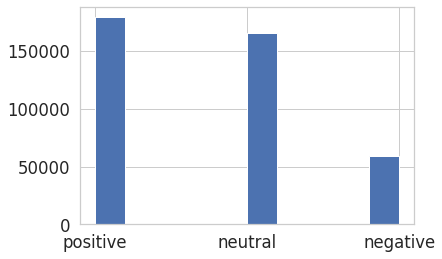

In [ ]:
df.sentiment.hist()

In [ ]:
df.to_csv("/content/drive/Shareddrives/MIT808 - group 6/data/senetimets.csv")

Now the Automate the sentiments by bulding a model

In [ ]:
X=df['statuses_text']
y=df['sentiment']

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
stop_words=stopwords.words('english')
stemmer=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
cleaned_data=[]
for i in range(len(X)):
   tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
   tweet=tweet.lower().split()
   tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words)]
   tweet=' '.join(tweet)
   cleaned_data.append(tweet)

In [ ]:
cv= TfidfVectorizer(max_features=3000,stop_words=['rt'])

In [ ]:
X_fin =cv.fit_transform(cleaned_data)

In [ ]:

sentiment_ordering = ['negative', 'neutral', 'positive']
y = y.apply(lambda x: sentiment_ordering.index(x))

In [ ]:
y

0         2
1         2
2         1
3         2
4         2
         ..
404763    0
404764    1
404765    2
404766    2
404767    1
Name: sentiment, Length: 404768, dtype: int64

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.3)
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.89      0.66      0.75     18088
           1       0.86      0.83      0.85     49850
           2       0.81      0.91      0.86     53493

    accuracy                           0.84    121431
   macro avg       0.85      0.80      0.82    121431
weighted avg       0.84      0.84      0.84    121431



In [ ]:
# training a Logistic Regression model 
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(solver='lbfgs')
cl=LR_model.fit(X_train,y_train)
cl.predict(X_test)
cl.score(X_test,y_test)


0.9334436840674951

In [ ]:
# # training a Logistic Regression model with cv=5
from sklearn.linear_model import LogisticRegressionCV
cv=5
LR_model = LogisticRegression(solver='lbfgs')
cl=LR_model.fit(X_train,y_train)
cl.predict(X_test)
cl.score(X_test,y_test)

0.9334436840674951